In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("Market.csv")
df=df.dropna()[:1000]
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df1=df.reset_index()['Close']
df1.head()

0    528.690002
1    527.210022
2    527.840027
3    531.119995
4    532.070007
Name: Close, dtype: float64

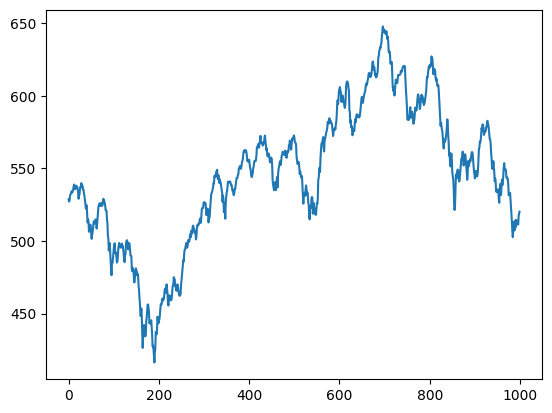

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
# normalising df1 data
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.48540339]
 [0.47901204]
 [0.48173274]
 [0.4958974 ]
 [0.50000006]
 [0.50228875]
 [0.50777338]
 [0.50958709]
 [0.50548469]
 [0.51006232]
 [0.51459674]
 [0.52327704]
 [0.52966838]
 [0.52418376]
 [0.51554669]
 [0.51688542]
 [0.52418376]
 [0.5260407 ]
 [0.52375201]
 [0.52284502]
 [0.51554669]
 [0.50548469]
 [0.4872171 ]
 [0.49727936]
 [0.50000006]
 [0.51459674]
 [0.52237005]
 [0.52055634]
 [0.53377105]
 [0.52737943]
 [0.52694769]
 [0.524659  ]
 [0.51459674]
 [0.51416473]
 [0.50181377]
 [0.49727936]
 [0.48354645]
 [0.47352742]
 [0.45845577]
 [0.46484712]
 [0.46756782]
 [0.43880648]
 [0.41691148]
 [0.42602352]
 [0.41915694]
 [0.38905687]
 [0.39130246]
 [0.40956991]
 [0.41004489]
 [0.40823118]
 [0.38266539]
 [0.36802562]
 [0.3799016 ]
 [0.38676805]
 [0.39726206]
 [0.41414755]
 [0.4205389 ]
 [0.4132407 ]
 [0.41643624]
 [0.42192086]
 [0.42602352]
 [0.41691148]
 [0.39864402]
 [0.41095188]
 [0.42878745]
 [0.44886848]
 [0.46303341]
 [0.46894978]
 [0.47352742]
 [0.47262043]
 [0.46575411]
 [0.46

In [7]:
# split train-test data for timeseries projects
train_size=int(len(df1)*0.65)
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]
train_data.shape,test_data.shape

((650, 1), (350, 1))

In [8]:
# create datasets such that train_x will contain the n number of previous stocks and train_y will contain the n+1 stock
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [9]:
time_step=100
train_x,train_y=create_dataset(train_data,time_step)
test_x,test_y=create_dataset(test_data,time_step)
train_x.shape,train_y.shape

((549, 100), (549,))

In [10]:
# reshape input into 3 dimemsions for LSTM
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [11]:
# create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

/Users/ananyasharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/Users/ananyasharma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - loss: 0.1198 - val_loss: 0.0492
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0198 - val_loss: 0.0052
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0

In [15]:
# predicting data
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [16]:
# transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
# calculating RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_y,train_predict))

528.8029428490833

In [18]:
math.sqrt(mean_squared_error(test_y,test_predict))

566.4799977934033

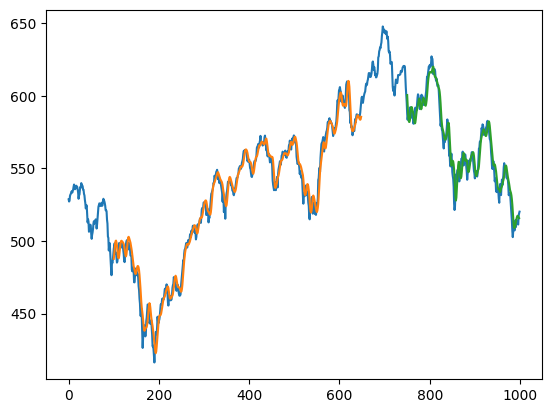

In [19]:
# plotting
look_back=100
# shifting train predictions for plotting
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
# shifting test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# While the exact price points from our predicted price aren't always close to the actual price, our model did still indicate overall trends such as going up or down.

In [20]:
len(test_data)
# predicting next 30 days stock price.
# firstly we will take last 100 data from test_data and store them in temp_input

350

In [21]:
# forecasting stock price
x_input=test_data[250:].reshape(1,-1)
x_input

array([[0.54793571, 0.56758499, 0.56620329, 0.57030569, 0.56482133,
        0.55342033, 0.56119364, 0.57579031, 0.60550186, 0.63698389,
        0.63879787, 0.65706519, 0.65525148, 0.66254981, 0.6821991 ,
        0.69817773, 0.69040416, 0.70867175, 0.70595105, 0.69908446,
        0.67718945, 0.68081713, 0.68859045, 0.68677673, 0.68906542,
        0.69999145, 0.70137341, 0.71692003, 0.71916575, 0.71096043,
        0.70728978, 0.69360009, 0.68310582, 0.66440675, 0.66345654,
        0.65114881, 0.62420119, 0.60774759, 0.58218166, 0.57579031,
        0.58403886, 0.59911051, 0.58218166, 0.56667827, 0.53925541,
        0.54750396, 0.54020562, 0.50868036, 0.51235101, 0.50686639,
        0.50868036, 0.51554669, 0.50911211, 0.4872171 , 0.47534113,
        0.51187604, 0.53105035, 0.50958709, 0.49818635, 0.52513398,
        0.54430828, 0.52785467, 0.54154436, 0.55523404, 0.58127494,
        0.59315091, 0.5766973 , 0.57306961, 0.57488333, 0.56849198,
        0.54979265, 0.55113138, 0.54659697, 0.54

In [22]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [26]:
# now we will run a loop such that it will predict 101th day output on the basis of 100 inputs in temp_input. it will add the obtained output in temp_input
# and temp_output. then it will forget the first input in temp_input and again run the said above with 100 inputs 30 times.
i=0
temp_output=[]
n_steps=100
while(i<30):
    x_input=np.array(temp_input)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    temp_output.extend(yhat[0].tolist())
    i=i+1
temp_output=np.array(temp_output).reshape(-1,1)
print(temp_output)
len(temp_output)

[[0.54878742]
 [0.55053473]
 [0.55226445]
 [0.5539766 ]
 [0.55567181]
 [0.55734962]
 [0.55901092]
 [0.56065547]
 [0.56228375]
 [0.56389552]
 [0.56549114]
 [0.56707036]
 [0.56863362]
 [0.57018042]
 [0.57171124]
 [0.57322562]
 [0.57472402]
 [0.57620603]
 [0.57767177]
 [0.57912159]
 [0.58055478]
 [0.58197206]
 [0.58337331]
 [0.58475834]
 [0.58612758]
 [0.58748078]
 [0.58881849]
 [0.59014034]
 [0.59144682]
 [0.59273773]]


30

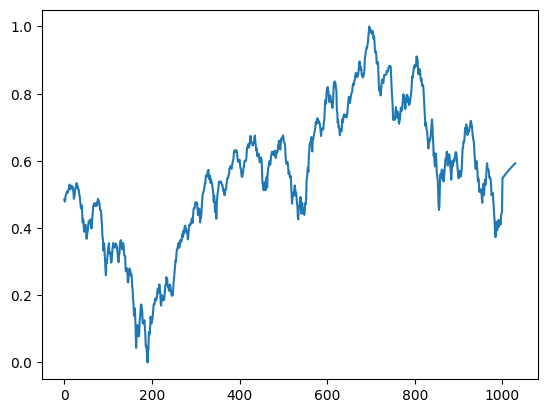

In [27]:
# plotting predicted data
df3=df1.tolist()
df3.extend(temp_output)
plt.plot(df3)

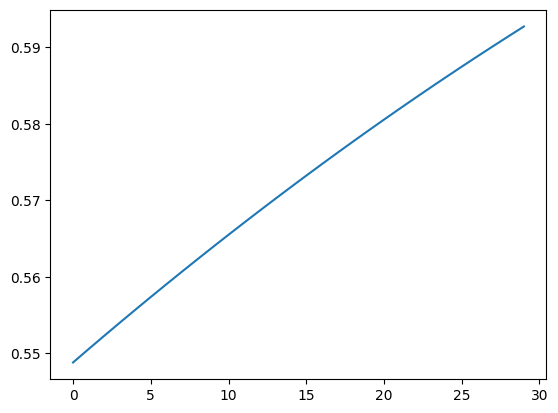

In [28]:
plt.plot(temp_output)